In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


### **Data Upload:**

In [4]:
df = pd.read_csv('..\data\Cleaned_Churn_modelling.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Cash\AppData\Local\Temp\ipykernel_13660\115313594.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Cleaned_Churn_modelling.csv')


In [5]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0
4,645,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0,0,1


### **Preprocessing:**

In [6]:
# Assigning the independent variables to the X and the dependent variables to y.
x= df.drop('Exited',axis=1) # Drops column "Exited"and stores all the other columms in a table
y= df['Exited'] # Stores the values of the "Exited" column in a table.

# Splits the data into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the x data
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Build Model**

In [7]:
ANN = models.Sequential([  #Initializes the ANN
    
    # Input layer
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)), #This input layer has 128 neurons that processes one column at a time using the activation'relu'.
    layers.Dropout(0.4),

    # Hidden layer 
    layers.Dense(units=64, activation='relu'), # Sorts through all of the probabilities using a 64 nodes.
    layers.Dropout(0.3),

    # Hidden layer 
    layers.Dense(units=32, activation='relu'), # Sorts through all of the probabilities using a 32 nodes.
    layers.Dropout(0.2),


    # Output layer
    layers.Dense(1, activation='sigmoid')  # Outputs a single sigmoid value
])

C:\Users\Cash\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Train Model:**

In [8]:
# Compile ANN
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compute class weights and fixes any imbalance in the data
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train) # creates a more balanced decision boundery by taking the minorty class into consideration.
class_weight_dict = dict(enumerate(class_weights))

# Fitting the training data into the ANN
history=ANN.fit(X_train, y_train, epochs=40, batch_size=32,validation_split=0.2, class_weight=class_weight_dict)

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5827 - loss: 0.6592 - val_accuracy: 0.6837 - val_loss: 0.5893
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6825 - loss: 0.5893 - val_accuracy: 0.7119 - val_loss: 0.5514
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6993 - loss: 0.5754 - val_accuracy: 0.7500 - val_loss: 0.5019
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7226 - loss: 0.5417 - val_accuracy: 0.7725 - val_loss: 0.4596
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.5138 - val_accuracy: 0.7900 - val_loss: 0.4528
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7775 - loss: 0.4894 - val_accuracy: 0.7944 - val_loss: 0.4461
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7724 - loss: 0.4967 - val_accuracy: 0.8100 - val_loss: 0.4294
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7910 - loss: 0.4733 - val_accuracy: 0.

### **Model Evaluation:**

In [9]:
loss,accuracy = ANN.evaluate(X_test,y_test)
print(f'loss = {loss:.4f}')
print(f'Accuracy = {accuracy:.4f}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8109 - loss: 0.4355  
loss = 0.4470
Accuracy = 0.7975


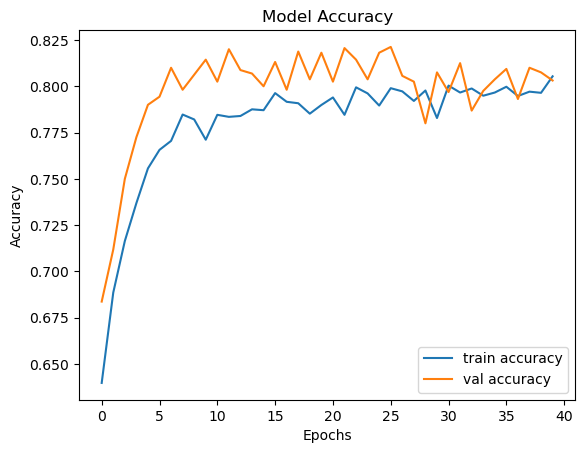

In [10]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
ypredrun = ANN.predict(X_test)
ypredresults = (ypredrun>0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, ypredresults))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1627
           1       0.47      0.71      0.57       373

    accuracy                           0.80      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.84      0.80      0.81      2000



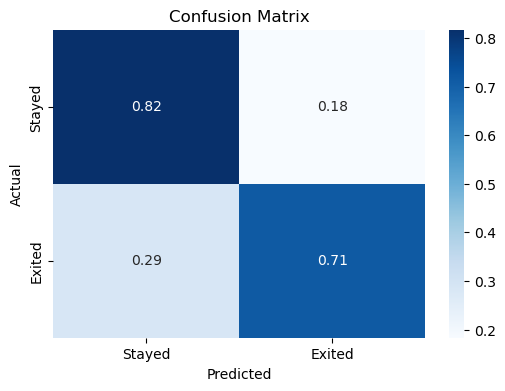

In [12]:
cm = confusion_matrix(y_test, ypredresults)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()